## Problem description
It has been established that certain behaviors are the primary cause for some disease, for instance, indulgent intake of sugar and fat could lead to obesity. Although it is relatively easy to identify one or two behaviors’ effect on a certain disease, the combined effect of multiple behaviors remained to be answered. Using machine learning techniques provide a possible avenue for such challenge.

In this project, exploratory data analysis is performed to understand features in the dataset. Multiple classifiers are utilized to predict disease occurrence with respect to a class of behaviors.

## Target clients
Health professionals. This study could serve as a complementary guideline for behavior recommendation to the patients
Patients. Patients can use this study to adjust their daily behavior so as to reduce the risk of getting some diseases, or mitigating the symptoms of some diseases.

Insurance companies. Insurance companies can use this study to predict the likelihood of health deterioration of an insured based on his/her behaviors, so that a more accurate and reasonable insurance policy can be offered.

## Data
The data is called Behavior Risk Factor Surveillance System from CDC (Center for Disease Control and Prevention). CDC conducts a behavior survey each year, which covers more than 300,000 respondents cross the country of different genders, ages, races, etc. Data can be found here: https://www.cdc.gov/brfss/annual_data/annual_data.htm

The challenges of conducting multi-year analysis are1) the change in variable code names and, 2) large number of variables. The data table only has code names, which are abbreviations of actual variable names. To understand the meaning of code names, one has to consult the code book provided by CDC. It is a non trivial task given that more than 200 variables are available. Each year, due to the slight change in survey questions, variable names, along with the corresponding code names, change accordingly. Therefore extra effort has to be spent for a multi-year analysis. In this project, I only focus on the data of a specific year (2015), due to time constraint. 

On CDC website, BRFSS data is available from 1987 to current. If time allows, a time series analysis is highly recommended to understand changes in behaviors and diseases of people in the United States







### 1. EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('ggplot')

In [4]:
# only data from 2015 is used for this study
# however data is available from 1980s to present
path = "C:/Users/yao_p/Downloads/behavioral-risk-factor-surveillance-system/2015.csv"
df = pd.read_csv(path)
print('The number of independent variables in the dataset is: {}'.format(df.shape[1]))

The number of independent variables in the dataset is: 330


330 features can be categorized as the following major groups:
+ Demography
+ General information. This Includes residency, gender, income level, education level, marriage status, number of working hours per week, whether or not currently taking care of significant other
+ Illness history. This includes many behavoiral related diseases such as high blood pressure, high cholesterol, diabetes, obesity, heart disease, skin cancer, etc. It also contains disease types that are not related to behavior, such as asthema.
+ Daily behaviors. This includes daily diet (fruit and vegetable intake per day) and weekly exercise (how many mins of exercise per week)

after going through all 330 features in the dataset, the following are believed to be most relavent to the project. Exploratory data analysis is performed.

In [5]:
selected_col = ['_STATE',
                'PHYSHLTH',
                'MENTHLTH',
                'POORHLTH',
                'CVDINFR4',
                'CVDCRHD4',
                'CVDSTRK3',
                'ASTHMA3',
                'CHCSCNCR',
                'CHCOCNCR',
                'ADDEPEV2',
                'CHCKIDNY',
                'MARITAL',
                'DIABETE3',
               'GENHLTH',
               'EDUCA',
               'SCNTLWK1',
               'LSATISFY',
                'ADPLEASR',
                'ADDOWN',
                'ADSLEEP',
                'ADENERGY',
                'ADTHINK',
               '_RFCHOL',
               '_MICHD',
               '_ASTHMS1',
               '_AGEG5YR',
               'HTIN4',
               'WTKG3',
               '_BMI5',
               '_BMI5CAT',
               '_RFBMI5',
               '_EDUCAG',
               '_INCOMG',
               '_RFSMOK3',
               '_RFBING5',
               '_DRNKWEK',
               '_RFDRHV5',
               'FTJUDA1_',
               'FRUTDA1_',
               'BEANDAY_',
               'GRENDAY_',
               'ORNGDAY_',
               '_FRUTSUM',
               '_VEGESUM',
               'ACTIN11_',
               'ACTIN21_',
               'PADUR1_',
               'PADUR2_',
               'PAFREQ1_',
               'PAFREQ2_',
               '_MINAC11',
               '_MINAC21',
               'PA1MIN_',
               'PAVIG11_',
               'PAVIG21_',
               '_PA150R2',
               '_PA300R2',
               '_PAREC1',
               '_RFHYPE5',
               ]
df_reduced = df[selected_col]

In [6]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 60 columns):
_STATE      441456 non-null int64
PHYSHLTH    441455 non-null float64
MENTHLTH    441456 non-null int64
POORHLTH    226964 non-null float64
CVDINFR4    441456 non-null int64
CVDCRHD4    441455 non-null float64
CVDSTRK3    441456 non-null int64
ASTHMA3     441456 non-null int64
CHCSCNCR    441455 non-null float64
CHCOCNCR    441456 non-null int64
ADDEPEV2    441456 non-null int64
CHCKIDNY    441456 non-null int64
MARITAL     441456 non-null int64
DIABETE3    441449 non-null float64
GENHLTH     441454 non-null float64
EDUCA       441456 non-null int64
SCNTLWK1    38422 non-null float64
LSATISFY    20052 non-null float64
ADPLEASR    20445 non-null float64
ADDOWN      20429 non-null float64
ADSLEEP     20419 non-null float64
ADENERGY    20413 non-null float64
ADTHINK     20381 non-null float64
_RFCHOL     382302 non-null float64
_MICHD      437514 non-null float64
_ASTHMS1    4414

A quick data check suggest that the following features:
+ SCNTLWK1. How many hours per week did you walk?
+ LSATISFY. Satisfaction with life
+ ADPLEASR. Days had little pleasure doing things
+ ADDOWN. Days felt depressed, down or hopeless
+ ADSLEEP. Days had trouble with sleep
+ ADENERGY. Days were tired or had little energy
+ ADTHINK. Days had trouble focusing

have less than 10% of non-null data. Therefore these features are removed from machine learning model building.

In [0]:
def sort_dict(series, dic):
    temp = Counter(series.dropna())
    temp = sorted(temp.items(), key=lambda x: x[0])
    labels = []
    values = []
    for i in range(len(temp)):
        labels.append(dic[temp[i][0]])
        values.append(temp[i][1])
    return labels, values

def pie(labels, values, title=''):
    plt.pie(values, labels=labels)
    plt.title(title)
    plt.axis('equal')
    plt.show()

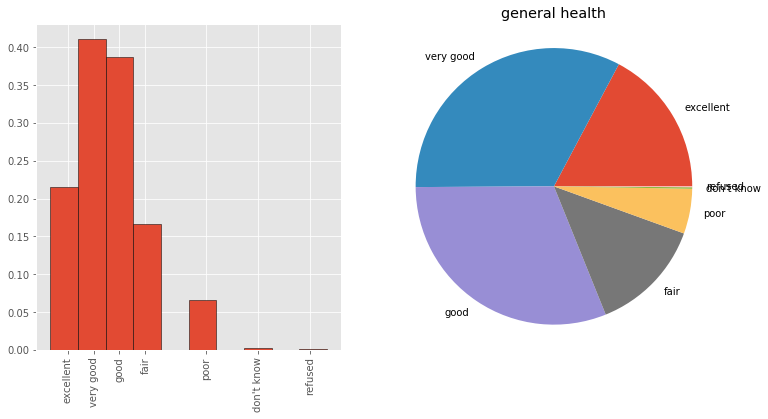

In [0]:
plt.figure(figsize=(12,6))
genhlth_dict = {1:'excellent', 
                2:'very good', 
                3:'good', 
                4:'fair', 
                5:'poor', 
                7:"don't know", 
                9:'refused'}
plt.subplot(1,2,1)
df_reduced['GENHLTH'].hist(density=1, edgecolor='black')
plt.xticks([1.5,2.25,3,3.75,5.5,7,8.5], genhlth_dict.values(), rotation=90)

plt.subplot(1,2,2)
labels, values = sort_dict(df_reduced['GENHLTH'], genhlth_dict)
pie(labels, values, 'general health')

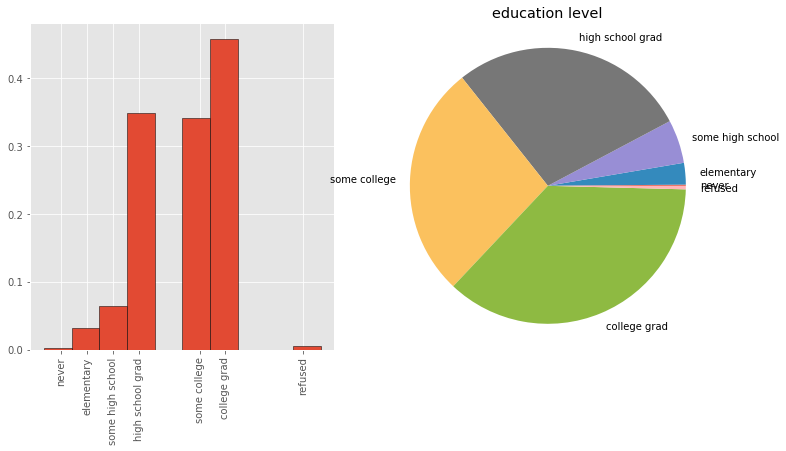

In [0]:
plt.figure(figsize=(12,6))
edu_dict = {1:'never', 
                2:'elementary', 
                3:'some high school', 
                4:'high school grad', 
                5:'some college', 
                6:"college grad", 
                9:'refused'}
plt.subplot(1,2,1)
df_reduced['EDUCA'].hist(density=1, edgecolor='black')
plt.xticks([1.5,2.25,3,3.75,5.5,6.25,8.5], edu_dict.values(), rotation=90)

plt.subplot(1,2,2)
labels, values = sort_dict(df_reduced['EDUCA'], edu_dict)
pie(labels, values, 'education level')

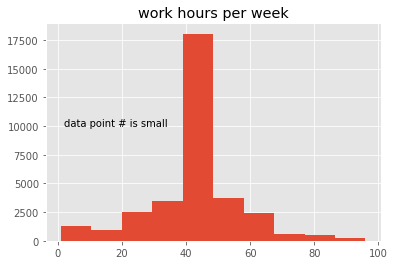

In [0]:
df_reduced.loc[df_reduced['SCNTLWK1']<97,'SCNTLWK1'].hist()
plt.title('work hours per week')
plt.text(2,10000,'data point # is small')
plt.show()

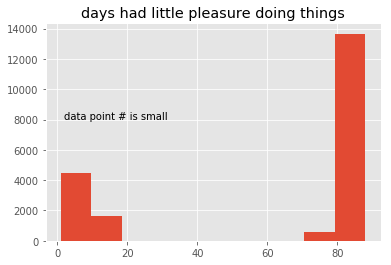

In [0]:
df_reduced.loc[df_reduced['ADPLEASR']<97,'ADPLEASR'].hist()
plt.title('days had little pleasure doing things')
plt.text(2,8000,'data point # is small')
plt.show()

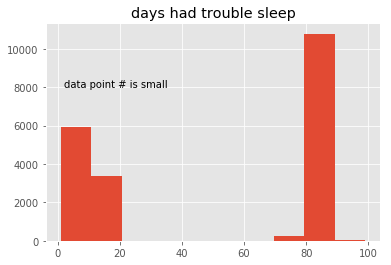

In [0]:
df_reduced.loc[df_reduced['ADSLEEP']<100,'ADSLEEP'].hist()
plt.title('days had trouble sleep')
plt.text(2,8000,'data point # is small')
plt.show()

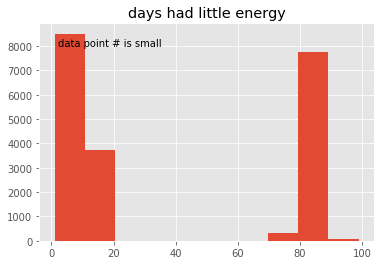

In [0]:
df_reduced.loc[df_reduced['ADENERGY']<100,'ADENERGY'].hist()
plt.title('days had little energy')
plt.text(2,8000,'data point # is small')
plt.show()

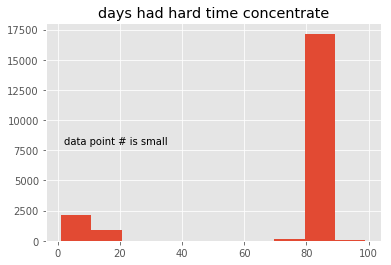

In [0]:
df_reduced.loc[df_reduced['ADTHINK']<100,'ADTHINK'].hist()
plt.title('days had hard time concentrate')
plt.text(2,8000,'data point # is small')
plt.show()

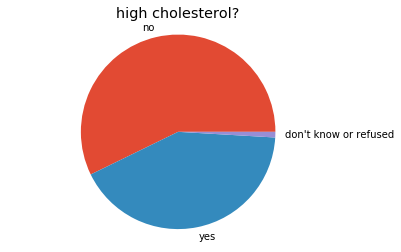

In [0]:
choles_dict = {1: 'no',
              2: 'yes',
              9: "don't know or refused"}
labels, values = sort_dict(df_reduced['_RFCHOL'], choles_dict)
pie(labels, values, 'high cholesterol?')

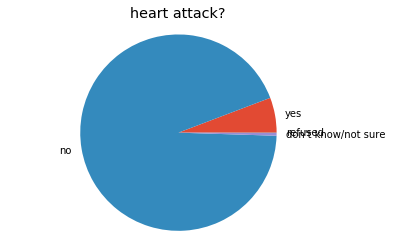

In [0]:
heart_dict = {1:'yes',
             2:'no',
             7:"don't know/not sure",
             9:'refused'}

labels, values = sort_dict(df_reduced['CVDINFR4'], heart_dict)
pie(labels, values, 'heart attack?')

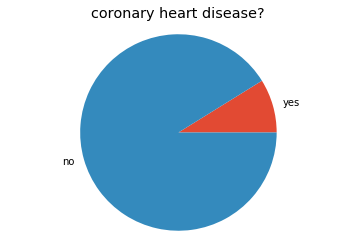

In [0]:
chd_dict = {1: 'yes',
            2: 'no'}
labels, values = sort_dict(df_reduced['_MICHD'], chd_dict)
pie(labels, values, 'coronary heart disease?')

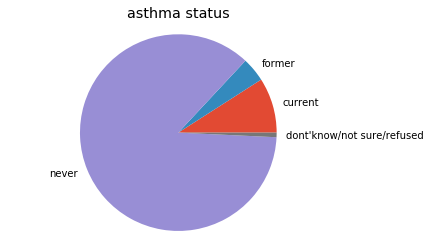

In [0]:
asth_dict = {1:'current',
           2:'former',
           3:'never',
           9:"dont'know/not sure/refused"}
labels, values = sort_dict(df_reduced['_ASTHMS1'], asth_dict)
pie(labels, values, 'asthma status')

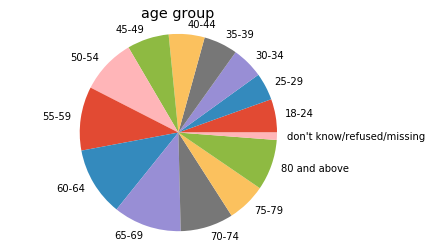

In [0]:
age_dict = {1:'18-24',
           2:'25-29',
           3:'30-34',
           4:'35-39',
           5:'40-44',
           6:'45-49',
           7:'50-54',
           8:'55-59',
           9:'60-64',
           10:'65-69',
           11:'70-74',
           12:'75-79',
           13:'80 and above',
           14:"don't know/refused/missing"}
labels, values = sort_dict(df_reduced['_AGEG5YR'], age_dict)
pie(labels, values, 'age group')

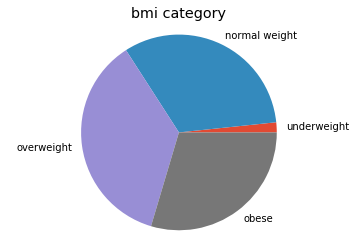

In [0]:
bmi_dict = {1:'underweight',
           2:'normal weight',
           3:'overweight',
           4:'obese',
           5:"don't know/refused/missing"}
labels, values = sort_dict(df_reduced['_BMI5CAT'], bmi_dict)
pie(labels, values, 'bmi category')

Text(0.5,1,'BMI')

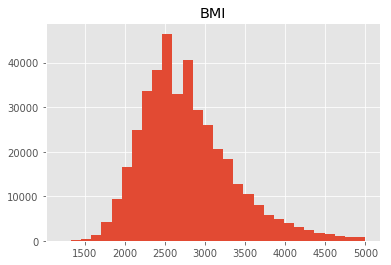

In [0]:
df_reduced.loc[df_reduced['_BMI5']<5000, '_BMI5'].hist(bins=30)
plt.title('BMI')

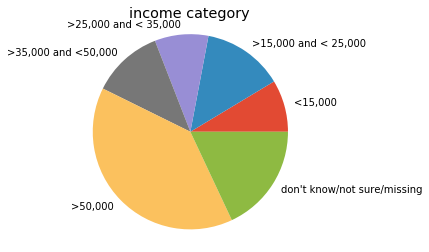

In [0]:
income_dict = {1:'<15,000',
              2:'>15,000 and < 25,000',
              3:'>25,000 and < 35,000',
              4:'>35,000 and <50,000',
              5:'>50,000',
              9:"don't know/not sure/missing"}
labels, values = sort_dict(df_reduced['_INCOMG'], income_dict)
pie(labels, values, 'income category')

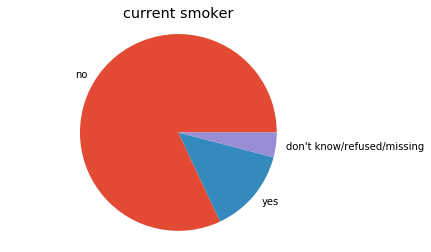

In [0]:
smoke_dict = {1:'no',
             2:'yes',
             9:"don't know/refused/missing"}
labels, values = sort_dict(df_reduced['_RFSMOK3'], smoke_dict)
pie(labels, values, 'current smoker')

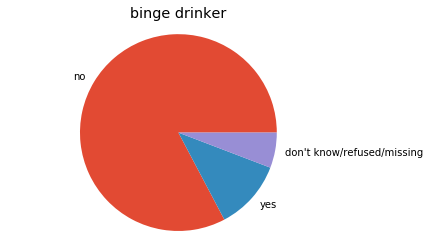

In [0]:
binge_dict = {1:'no',
             2:'yes',
             9:"don't know/refused/missing"}
labels, values = sort_dict(df_reduced['_RFBING5'], binge_dict)
pie(labels, values, 'binge drinker')

C:\Users\yao_p\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


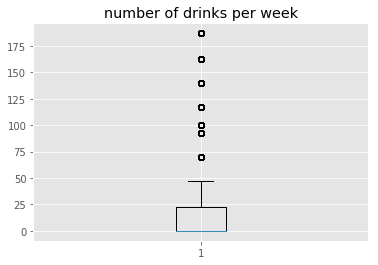

In [0]:
df_reduced[df_reduced['_DRNKWEK']<1]['_DRNKWEK']=0
plt.boxplot(df_reduced[df_reduced['_DRNKWEK']<200]['_DRNKWEK'])
plt.title('number of drinks per week')
plt.show()

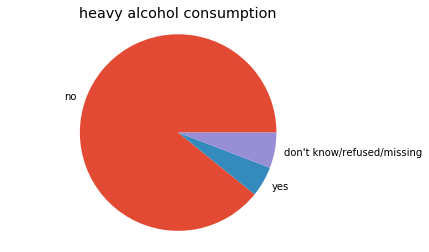

In [0]:
heavy_alc_dict = {1:'no',
                  2:'yes',
                  9:"don't know/refused/missing"}
labels, values = sort_dict(df_reduced['_RFDRHV5'], heavy_alc_dict)
pie(labels, values, 'heavy alcohol consumption')

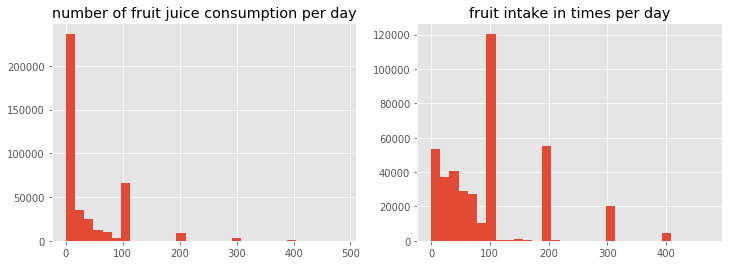

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_reduced.loc[df_reduced['FTJUDA1_']<500,'FTJUDA1_'].hist(bins=30)
plt.title('number of fruit juice consumption per day')
plt.subplot(1,2,2)
df_reduced.loc[df_reduced['FRUTDA1_']<500,'FRUTDA1_'].hist(bins=30)
plt.title('fruit intake in times per day')
plt.show()

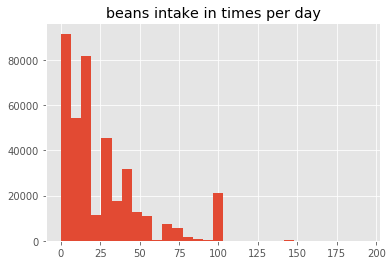

In [0]:
df_reduced[df_reduced['BEANDAY_']<200].loc[:,'BEANDAY_'].hist(bins=30)
plt.title('beans intake in times per day')
plt.show()

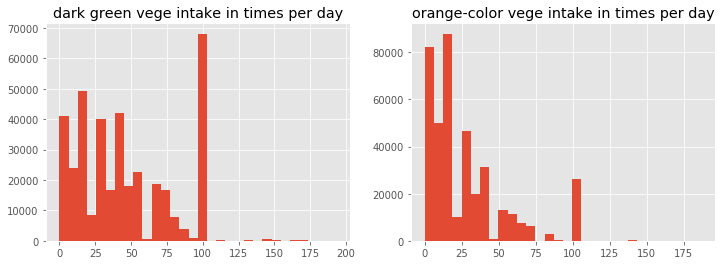

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_reduced.loc[df_reduced['GRENDAY_']<200, 'GRENDAY_'].hist(bins=30)
plt.title('dark green vege intake in times per day')
plt.subplot(1,2,2)
df_reduced.loc[df_reduced['ORNGDAY_']<200, 'ORNGDAY_'].hist(bins=30)
plt.title('orange-color vege intake in times per day')
plt.show()

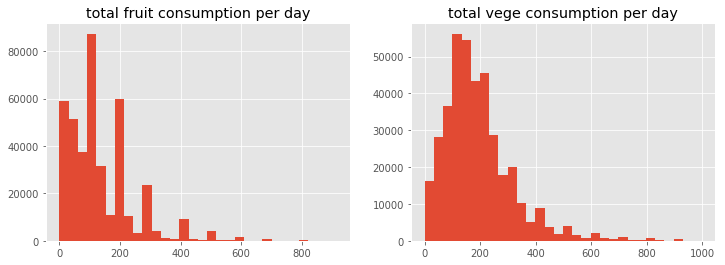

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_reduced.loc[df_reduced['_FRUTSUM']<1000, '_FRUTSUM'].hist(bins=30)
plt.title('total fruit consumption per day')
plt.subplot(1,2,2)
df_reduced.loc[df_reduced['_VEGESUM']<1000, '_VEGESUM'].hist(bins=30)
plt.title('total vege consumption per day')
plt.show()

C:\Users\yao_p\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


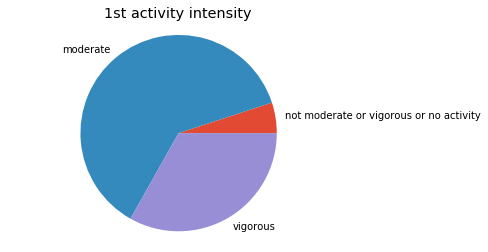

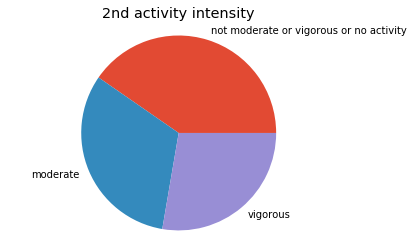

In [0]:
act1_dict = {0:'not moderate or vigorous or no activity',
            1:'moderate',
            2:'vigorous'}
df_reduced.loc[df_reduced['ACTIN11_']<1, 'ACTIN11_']=0
labels, values = sort_dict(df_reduced['ACTIN11_'], act1_dict)
pie(labels, values, '1st activity intensity')

act2_dict = {0:'not moderate or vigorous or no activity',
            1:'moderate',
            2:'vigorous'}
df_reduced.loc[df_reduced['ACTIN21_']<1, 'ACTIN21_']=0
labels, values = sort_dict(df_reduced['ACTIN21_'], act1_dict)
pie(labels, values, '2nd activity intensity')

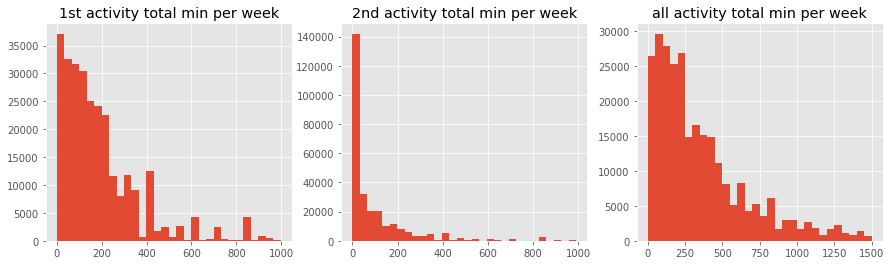

In [0]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
df_reduced.loc[df_reduced['_MINAC11']<1000, '_MINAC11'].hist(bins=30)
plt.title('1st activity total min per week')
plt.subplot(1,3,2)
df_reduced.loc[df_reduced['_MINAC21']<1000, '_MINAC21'].hist(bins=30)
plt.title('2nd activity total min per week')
plt.subplot(1,3,3)
df_reduced.loc[df_reduced['PA1MIN_']<1500, 'PA1MIN_'].hist(bins=30)
plt.title('all activity total min per week')
plt.show()

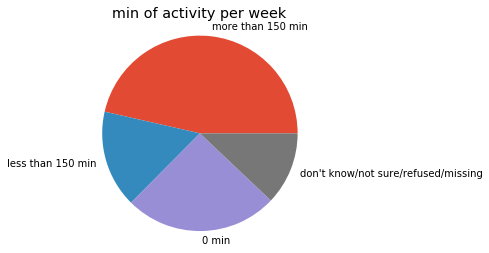

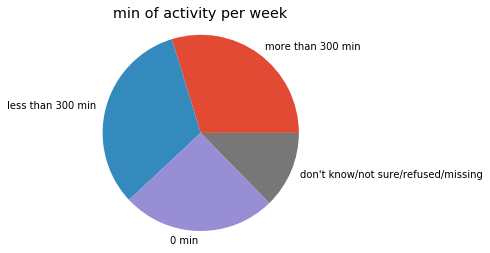

In [0]:
# _PA150R2
# _PA300R2 

m150_dict = {1:'more than 150 min',
            2:'less than 150 min',
            3:'0 min',
            9:"don't know/not sure/refused/missing"}
labels, values = sort_dict(df_reduced['_PA150R2'], m150_dict)
pie(labels, values, 'min of activity per week')

m300_dict = {1:'more than 300 min',
            2:'less than 300 min',
            3:'0 min',
            9:"don't know/not sure/refused/missing"}
labels, values = sort_dict(df_reduced['_PA300R2'], m300_dict)
pie(labels, values, 'min of activity per week')

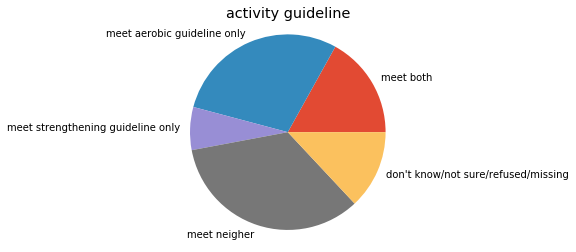

In [0]:
guide_dict = {1:'meet both',
            2:'meet aerobic guideline only',
            3:'meet strengthening guideline only',
            4:'meet neigher',
            9:"don't know/not sure/refused/missing"}
labels, values = sort_dict(df_reduced['_PAREC1'], guide_dict)
pie(labels, values, 'activity guideline')

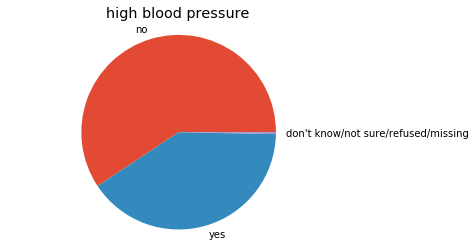

In [0]:
hp_dict = {1:'no',
            2:'yes',
            9:"don't know/not sure/refused/missing"}
labels, values = sort_dict(df_reduced['_RFHYPE5'], hp_dict)
pie(labels, values, 'high blood pressure')

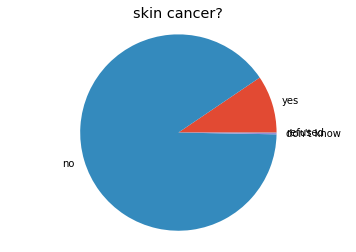

In [0]:
skin_dict = {1:'yes',
            2:'no',
            7:"don't know",
            9:'refused'}
labels, values = sort_dict(df_reduced['CHCSCNCR'], skin_dict)
pie(labels, values, 'skin cancer?')

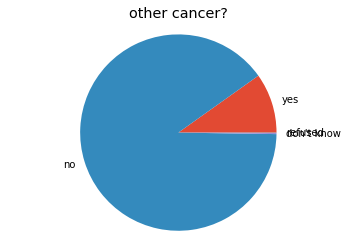

In [0]:
other_cancer_dict = {1:'yes',
            2:'no',
            7:"don't know",
            9:'refused'}
labels, values = sort_dict(df_reduced['CHCOCNCR'], other_cancer_dict)
pie(labels, values, 'other cancer?')

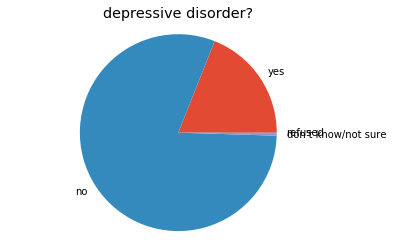

In [0]:
depress_dict = {1:'yes',
               2:'no',
               7:"don't know/not sure",
               9:'refused'}
labels, values = sort_dict(df_reduced['ADDEPEV2'], depress_dict)
pie(labels, values, 'depressive disorder?')

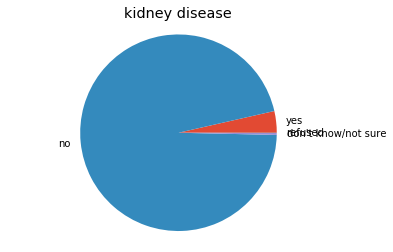

In [0]:
kidney_dict = {1:'yes',
               2:'no',
               7:"don't know/not sure",
               9:'refused'}
labels, values = sort_dict(df_reduced['CHCKIDNY'], kidney_dict)
pie(labels, values, 'kidney disease')

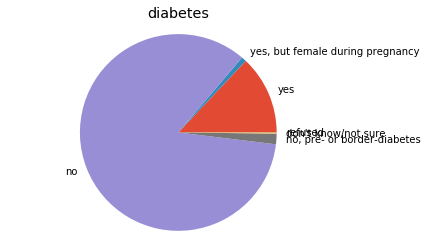

In [0]:
diab_dict = {1:'yes',
            2:'yes, but female during pregnancy',
            3:'no',
            4:'no, pre- or border-diabetes',
            7:"don't know/not sure",
            9:'refused'}
labels, values = sort_dict(df_reduced['DIABETE3'], diab_dict)
pie(labels, values, 'diabetes')

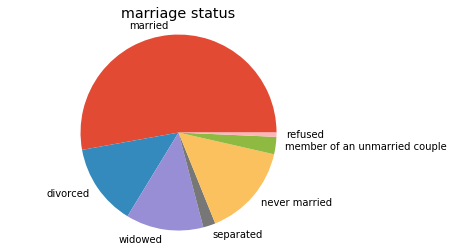

In [0]:
marr_dict = {1:'married',
            2:'divorced',
            3:'widowed',
            4:'separated',
            5:'never married',
            6:'member of an unmarried couple',
            9:'refused'}
labels, values = sort_dict(df_reduced['MARITAL'], marr_dict)
pie(labels, values, 'marriage status')